In [4]:
from pandas_datareader.stooq import StooqDailyReader
import datetime
import pandas as pd
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [63]:
!pip install yfinance
import yfinance as yf

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22622 sha256=2f675bbfe3587220ecafb4c7b920024118eafb0b02cb7307fdf363508625836d
  Stored in directory: c:\users\ring1\appdata\local\pip\cache\wheels\b4\c3\39\9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=35aa78595349b6cb220b7e2f74960ebd3db55a52f7694dfe4c12aa873f1d9430
  Stored in directory: c:\users\ring1\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [243]:
  
def get_indexes(start=datetime.datetime(2020, 1, 1),end=datetime.datetime(2020, 12, 31),brand='1305.JP',n=14,yfinance=True):
  date=start-datetime.timedelta(days=40)
  if yfinance!=True:
    stooq = StooqDailyReader(brand, start=date, end=end)
    data = stooq.read()
    diff=data["Close"].sort_index(ascending=True).diff()
    
  #input data must be pandas dataframe
  if yfinance==True:
    msft = yf.Ticker("MSFT")
    data = msft.history(start=start,end=end,interval="1h").sort_index(ascending=False)
    diff=data["Close"].diff()
    
      
        
  up=diff.copy()
  up[up<0]=0
  down=diff.copy()
  down[down>0]=0
  up_sma_14 = up.rolling(window=n, center=False).mean()
  down_sma_14 = down.abs().rolling(window=n, center=False).mean()
  RS = up_sma_14 / down_sma_14
  RSI = 100.0 - (100.0 / (1.0 + RS))

  #MacD
  short=data["Close"].sort_index(ascending=True).ewm(span=12,adjust=False).mean()
  long=data["Close"].sort_index(ascending=True).ewm(span=26,adjust=False).mean()
  macd=short-long
  signal = macd.ewm(span=9).mean()
  return RSI[30:], macd.sort_index(ascending=True)[30:],signal.sort_index(ascending=True)[30:],data["Close"][:-30].sort_index(ascending=True)        


In [266]:
  
def get_indexes_2(start=datetime.datetime(2020, 1, 1),end=datetime.datetime(2020, 12, 31),brand='1305.JP',n=14,yfinance=True):
  date=start-datetime.timedelta(days=40)
  #if yfinance!=True:
    #stooq = StooqDailyReader(brand, start=date, end=end)
    #data = stooq.read()
    #diff=data["Close"].sort_index(ascending=True).diff()
    
  #input data must be pandas dataframe
  if yfinance==True:
    msft = yf.Ticker("MSFT")
    data = msft.history(start=date,end=end,interval="1d")
    diff=data["Close"].diff()
    
  
  up=diff.copy()
  up[up<0]=0
  down=diff.copy()
  down[down>0]=0
  up_sma_14 = up.rolling(window=n, center=False).mean()
  down_sma_14 = down.abs().rolling(window=n, center=False).mean()
  RS = up_sma_14 / down_sma_14
  RSI = 100.0 - (100.0 / (1.0 + RS))
  RSI2=(up_sma_14)/(up_sma_14+down_sma_14)

  #MacD
  short=data["Close"].sort_index(ascending=True).ewm(span=12,adjust=False).mean()
  long=data["Close"].sort_index(ascending=True).ewm(span=26,adjust=False).mean()
  macd=short-long
  signal = macd.ewm(span=9).mean()
  return RSI[30:], macd.sort_index(ascending=True)[30:],signal.sort_index(ascending=True)[30:],data["Close"][:-30].sort_index(ascending=True)        


In [251]:
date=start-datetime.timedelta(days=40)
msft = yf.Ticker("MSFT")
data = msft.history(start=date,end=end,interval="1d")
diff=data["Close"].diff()

In [277]:
diff=data.diff()
up,down=diff.copy(),diff.copy()
up[up<0]=0
down[down>0]=0
down=np.abs(down)

In [278]:
down

Date
2019-11-21         NaN
2019-11-22    0.000000
2019-11-25    0.000000
2019-11-26    0.000000
2019-11-27    0.000000
                ...   
2020-11-10    7.360733
2020-11-11    0.000000
2020-11-12    1.107101
2020-11-13    0.000000
2020-11-16    0.000000
Name: Close, Length: 249, dtype: float64

In [295]:
up_list=[]
down_list=[]
for i in range(len(diff)):
    if i>=14:
        d_sum=sum(down[i-14:i])
        u_sum=sum(up[i-14:i])
        up_list.append(u_sum)
        down_list.append(d_sum)


In [294]:
up[i-14:i]

Series([], Name: Close, dtype: float64)

In [296]:
RSI_list=[]
for i in range(len(down_list)):
    
    RSI=up_list[i]/(down_list[i]+up_list[i])
    RSI=RSI*100
    RSI_list.append(RSI)

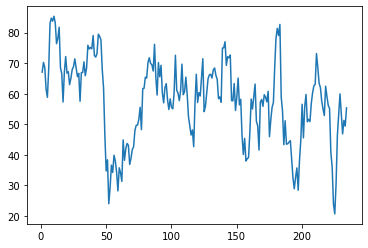

In [304]:
plt.plot(range(len(RSI_list)),RSI_list)

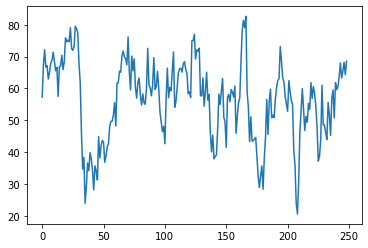

In [303]:
plt.plot(range(len(rsi_list)),rsi_list)

In [263]:
rsi_list,rsi_2,macd_list,signal_list,data=get_indexes_2()

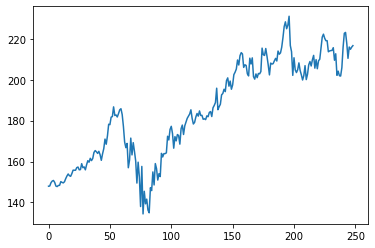

In [269]:
plt.plot(range(len(data)),data)

In [214]:



rsi_flag = 0
macd_flag = []
buy_flag=0
sell_flag=0
for i in range(len(data)):
    
    #simulate when to buy
    if (buy_flag % 2==0) or (buy_flag==0):
        
        if rsi_list[i] <= 20:
            rsi_flag = 1
        if (signal_list[i]-macd_list[i]<=0) & (rsi_flag == 1):
            
            buy_flag+=1
            macd_flag.append(buy_flag)
        else:macd_flag.append(buy_flag)
    #simulate when to sell
    elif buy_flag %2 !=0 :
        if rsi_list[i]>=70:
            sell_flag=1
        if (sell_flag==1) & (signal_list[i]-macd_list[i]>=0):
            buy_flag+=1
            macd_flag.append(buy_flag)
            
        else: macd_flag.append(buy_flag)


In [216]:
check=performance_check(data,macd_flag)

In [258]:
rsi_list

Date
2020-01-07    57.285116
2020-01-08    67.153807
2020-01-09    72.158472
2020-01-10    66.726101
2020-01-13    67.193932
                ...    
2020-12-23    63.273306
2020-12-24    65.451208
2020-12-28    68.214444
2020-12-29    64.341089
2020-12-30    68.543524
Name: Close, Length: 249, dtype: float64

In [143]:
def performance_check(data,macd_flag):
    max_=np.max(macd_flag)
    performance_list=[]
    if max_ %2 ==0:
        for i in range(0,max_,2):
            performance=data[macd_flag.index(i+1)]/data[macd_flag.index(i)]
            profit=data[macd_flag.index(i+1)]-data[macd_flag.index(i)]
            buy_date=data.index[i]
            sell_date=data.index[i+1]
            performance_dict={"peformance":performance,"profit":profit,
                                     "buy_date":buy_date,"sell_date":sell_date}
            performance_list.append(performance_dict)
            
    else: 
        max_-=1
        for i in range(0,max_,2):
            performance=data[macd_flag.index(i+1)]/data[macd_flag.index(i)]
            profit=data[macd_flag.index(i+1)]-data[macd_flag.index(i)]
            buy_date=data.index[i]
            sell_date=data.index[i+1]
            performance_dict={"peformance":performance,"profit":profit,
                                     "buy_date":buy_date,"sell_date":sell_date}
            performance_list.append(performance_dict)
    df=pd.DataFrame(performance_list)
    return df

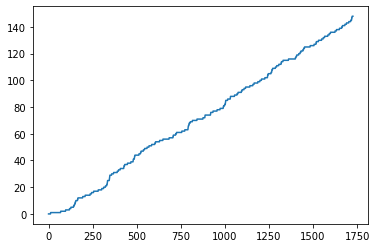